In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
### matplotlib 한글설정(Mac) ###
# from matplotlib import rc
# %matplotlib inline
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False
#-----------------------------#

### matplotlib 한글설정(Ubuntu) ###
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
#-----------------------------#

from PIL import Image

In [2]:
"""
### bash ###
$ apt-get install fonts-nanum*
$ fc-cache -fv
# if "sudo: fc-cache: command not found"
$ sudo apt install fontconfig

$ python -c "import matplotlib; print(matplotlib.__file__)" # matplotlib 경로 확인
$ cp /usr/share/fonts/truetype/nanum/Nanum* {위에서 확인한 matplotlib경로}/mpl-data/fonts/ttf/
$ rm -rf ~/.cache/matplotlib/*

### python ###
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
"""

'\n### bash ###\n$ apt-get install fonts-nanum*\n$ fc-cache -fv\n# if "sudo: fc-cache: command not found"\n$ sudo apt install fontconfig\n\n$ python -c "import matplotlib; print(matplotlib.__file__)" # matplotlib 경로 확인\n$ cp /usr/share/fonts/truetype/nanum/Nanum* {위에서 확인한 matplotlib경로}/mpl-data/fonts/ttf/\n$ rm -rf ~/.cache/matplotlib/*\n\n### python ###\nimport matplotlib.font_manager\nfont_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext=\'ttf\')\n[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if \'Nanum\' in font]\n\nimport matplotlib.pyplot as plt\nplt.rc(\'font\', family=\'NanumGothicCoding\')\n\nimport matplotlib as mpl\nmpl.rcParams[\'axes.unicode_minus\'] = False\n'

In [3]:
# train/val 이미 나눠진 후.

import glob

train_png = r"/USER/mnc/fish/data/yolo_train_test_stratified/train/*.png"
train_txt = r"/USER/mnc/fish/data/yolo_train_test_stratified/train/*.txt"

val_png = r"/USER/mnc/fish/data/yolo_train_test_stratified/test/*.png"
val_txt = r"/USER/mnc/fish/data/yolo_train_test_stratified/test/*.txt"

test_png = r"/USER/mnc/fish/data/test/*.png"

# ------------------------------------------------------------

train_png_list = glob.glob(train_png)
train_txt_list = glob.glob(train_txt)

val_png_list = glob.glob(val_png)
val_txt_list = glob.glob(val_txt)

test_png_list = glob.glob(test_png)

print(train_png_list[:3], '\n', train_txt_list[:3], '\n', val_png_list[:3], '\n', val_txt_list[:3])

['/USER/mnc/fish/data/yolo_train_test_stratified/train/train_0.png', '/USER/mnc/fish/data/yolo_train_test_stratified/train/train_186.png', '/USER/mnc/fish/data/yolo_train_test_stratified/train/train_194.png'] 
 ['/USER/mnc/fish/data/yolo_train_test_stratified/train/train_0.txt', '/USER/mnc/fish/data/yolo_train_test_stratified/train/train_186.txt', '/USER/mnc/fish/data/yolo_train_test_stratified/train/train_194.txt'] 
 ['/USER/mnc/fish/data/yolo_train_test_stratified/test/train_185.png', '/USER/mnc/fish/data/yolo_train_test_stratified/test/train_192.png', '/USER/mnc/fish/data/yolo_train_test_stratified/test/train_195.png'] 
 ['/USER/mnc/fish/data/yolo_train_test_stratified/test/train_185.txt', '/USER/mnc/fish/data/yolo_train_test_stratified/test/train_192.txt', '/USER/mnc/fish/data/yolo_train_test_stratified/test/train_195.txt']


In [4]:
from pycocotools.coco import COCO

In [6]:
my_json = '/USER/mnc/fish/outputs/test_output_coco.json'
dh_json = '/USER/mnc/fish/outputs/submit_success.json'

coco_no = COCO(my_json)
coco_ok = COCO(dh_json)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


In [7]:
# Create train_data_info in dictionary

from collections import defaultdict

my_dict = defaultdict(list)
dh_dict  = defaultdict(list)

for i in range(149821):
    try:
        # annotation_id를 기반으로 annotation dict의 전체 정보를 return
        ann_info = coco_no.loadAnns(i)[0]

        image_id = ann_info['image_id']
        category = ann_info['category_id']
        bbox     = ann_info['bbox']

        file_name = coco_no.loadImgs(image_id)[0]['file_name']

        my_dict[file_name].append((image_id, category, bbox))
    except:
        pass

for i in range(149821):
    try:
        # annotation_id를 기반으로 annotation dict의 전체 정보를 return
        ann_info = coco_ok.loadAnns(i)[0]

        image_id = ann_info['image_id']
        category = ann_info['category_id']
        bbox     = ann_info['bbox']

        file_name = coco_ok.loadImgs(image_id)[0]['file_name']

        dh_dict[file_name].append((image_id, category, bbox))
    except:
        pass

In [18]:
test_png_list[3]

'/USER/mnc/fish/data/test/test_100.png'

In [11]:
my_dict['test_100.png'][0][2]

[96, 245, 494, 193]

In [12]:
dh_dict['test_100.png'][0][2]

[84, 262, 507, 146]

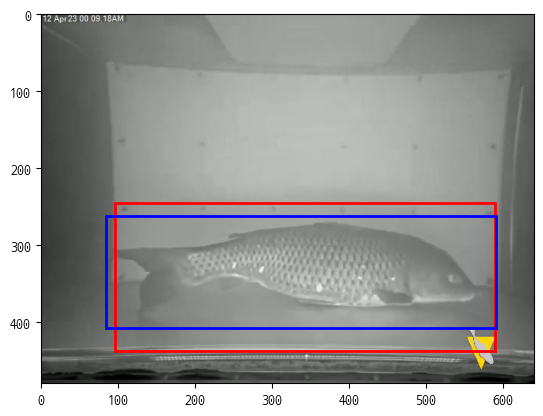

In [19]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

test_bbox_img = Image.open(test_png_list[3])

bbox_my = my_dict['test_100.png'][0][2]
bbox_dh = dh_dict['test_100.png'][0][2]

# 이미지를 Matplotlib로 표시
plt.imshow(test_bbox_img)

# bounding box 정보 추출 및 시각화

bbox_1 = bbox_my
bbox_2 = bbox_dh
category_id = "test"

# COCO annotation에서 (x, y, width, height) 형태를 (x, y, x+width, y+height)로 변환
x_1, y_1, width_1, height_1 = bbox_1
x_2, y_2, width_2, height_2 = bbox_2
# x, y, x2, y2 = x, y, x + width, y + height

# bounding box를 시각화
rect_1 = patches.Rectangle((x_1, y_1), width_1, height_1, linewidth=2, edgecolor="r", facecolor="none", label=f"Category {category_id}")
rect_2 = patches.Rectangle((x_2, y_2), width_2, height_2, linewidth=2, edgecolor="b", facecolor="none", label=f"Category {category_id}")
plt.gca().add_patch(rect_1)
plt.gca().add_patch(rect_2)

plt.show()


In [8]:
# image_id로 file_name 찾기
coco.loadImgs(90117)

[{'id': 90117,
  'width': 640,
  'height': 480,
  'file_name': 'train_63222.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0}]

In [9]:
# image_id로 annotaion_id 찾기
coco.getAnnIds(imgIds=90117)

[4761]

In [10]:
# annotation_id로 해당 annotation정보 찾기
coco.loadAnns(4761)

[{'id': 4761,
  'image_id': 90117,
  'category_id': 1,
  'segmentation': [],
  'area': 15675.597999999996,
  'bbox': [272.99, 287.36, 173.98, 90.1],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}}]

In [11]:
coco.loadAnns(4761)

[{'id': 4761,
  'image_id': 90117,
  'category_id': 1,
  'segmentation': [],
  'area': 15675.597999999996,
  'bbox': [272.99, 287.36, 173.98, 90.1],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}}]

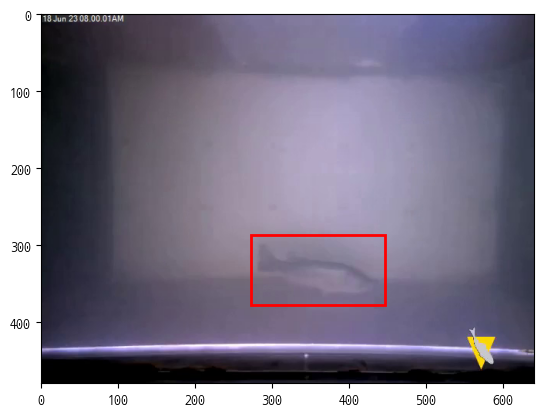

In [14]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

test_bbox_img = Image.open(cwd + "train/train_63222.png")

bbox_data = coco.loadAnns(4761)[0]['bbox']

# 이미지를 Matplotlib로 표시
plt.imshow(test_bbox_img)

# bounding box 정보 추출 및 시각화

bbox = bbox_data
category_id = "test"

# COCO annotation에서 (x, y, width, height) 형태를 (x, y, x+width, y+height)로 변환
x, y, width, height = bbox
# x, y, x2, y2 = x, y, x + width, y + height

# bounding box를 시각화
rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor="r", facecolor="none", label=f"Category {category_id}")
plt.gca().add_patch(rect)

plt.show()

In [7]:
# Category ID check
coco.getCatIds()

# find annotation ID of image_id
coco.getAnnIds(imgIds=1)
# find annotation ID of category_id
coco.getAnnIds(catIds=1)

# find Image ID of category_id
coco.getImgIds(catIds=1)

# Specific data of category_id
coco.loadCats(1)

# All specific annotation dict data of annotation_id
coco.loadAnns(1)

# All specific image dict data of image_id
coco.loadImgs(1)

[{'id': 1,
  'width': 640,
  'height': 480,
  'file_name': 'train_0.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0}]

In [8]:
coco.loadAnns(1)

[{'id': 1,
  'image_id': 1,
  'category_id': 3,
  'segmentation': [],
  'area': 40939.4791,
  'bbox': [37.98, 209.94, 369.19, 110.89],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}}]

In [9]:
coco.loadImgs(1)

[{'id': 1,
  'width': 640,
  'height': 480,
  'file_name': 'train_0.png',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0}]

In [17]:
coco.loadCats(1)[0]['name']

'베스'

In [18]:
categories_info = {coco.loadCats(i)[0]['name']: len(coco.getAnnIds(catIds=i)) for i in coco.getCatIds()}

print(f"{categories_info}\ntotal : {sum(categories_info.values())}")

{'농어': 180, '베스': 2344, '숭어': 651, '강준치': 2132, '블루길': 101, '잉어': 159, '붕어': 148, '누치': 586}
total : 6301


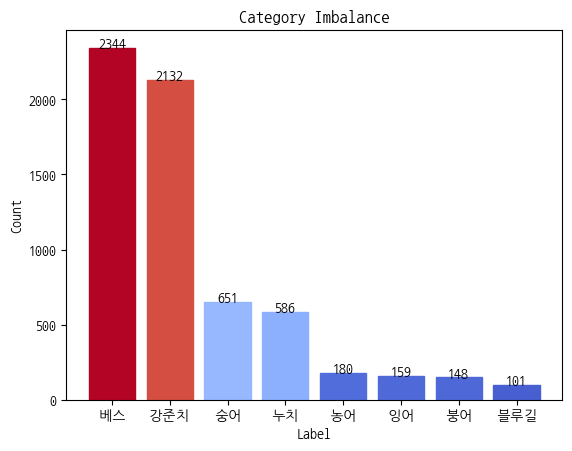

In [19]:
from collections import OrderedDict
import matplotlib.pyplot as plt

# 딕셔너리 데이터 정렬
visualize_dict = OrderedDict(sorted(categories_info.items(), key=lambda x: x[1], reverse=True))

# 딕셔너리의 키와 값을 추출
keys = list(visualize_dict.keys())
values = list(visualize_dict.values())

# 컬러맵 선택
cmap = plt.get_cmap('coolwarm')

# 바 그래프 생성
bars = plt.bar(keys, values)

# 컬러맵을 사용하여 바 그래프의 색상 설정
for bar, value in zip(bars, values):
    bar.set_color(cmap(value / max(values)) )

# 그래프에 레이블 추가
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, str(value), ha='center')

# 그래프 제목 및 레이블 설정
plt.title('Category Imbalance')
plt.xlabel('Label')
plt.ylabel('Count')

# 그래프 표시
plt.show()

In [26]:
categories_info = {coco.loadCats(i)[0]['name']: len(coco.getAnnIds(catIds=i)) for i in coco.getCatIds()}

print(f"{categories_info}\ntotal : {sum(categories_info.values())}")

# Create list of cat_0 ~ cat_7 image name.
for i in range(8):
    globals()[f"cat_{i}_list"] = ["train_" + str(i) + ".png" for i in coco.getAnnIds(catIds=i)]

len(cat_0_list), len(cat_1_list)

{'농어': 180, '베스': 2344, '숭어': 651, '강준치': 2132, '블루길': 101, '잉어': 159, '붕어': 148, '누치': 586}
total : 6301


(180, 2344)

In [1]:
cat_0_list[:10]

NameError: name 'cat_0_list' is not defined

In [27]:
import os
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, clear_output

# 이미지 파일이 있는 디렉토리 경로 설정
image_dir = train_dir  # 이미지 파일이 있는 디렉토리 경로를 지정합니다.
# image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
image_files = cat_2_list

# 이미지 파일을 하나씩 순회
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)
    
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("root/anaconda3/envs/fish/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf", 30)
    draw.text((250, 5), image_file, fill='red', font=font)
    
    display(img)

    # 사용자의 입력을 기다립니다.
    user_input = input("Press Enter to open the next image, or 'q' to quit...")

    # 이미지를 닫습니다.
    clear_output()

    # 사용자가 'q'를 누르면 루프를 종료합니다.
    if user_input.lower() == 'q':
        break

NameError: name 'cat_2_list' is not defined

In [44]:
len(train_list), len(test_list)

(104875, 44946)

In [ ]:
python main.py --path <Absolute path to dataset_root_dir> --output <Name of the json file>

python main.py --path <Absolute path to dataset_root_dir> --output /USER/mnc/fish/outputs/YOLO/YOLOtoCOCO_test.json

In [ ]:
mnc/fish/data/yolo_train
